# Endometrium analysis - main - clusters visualization

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata
import os
import sys

def MovePlots(plotpattern, subplotdir):
    os.system('mkdir -p '+str(sc.settings.figdir)+'/'+subplotdir)
    os.system('mv '+str(sc.settings.figdir)+'/*'+plotpattern+'** '+str(sc.settings.figdir)+'/'+subplotdir)

sc.settings.verbosity = 1  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.figdir = './figures_primaryall/'
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80)  # low dpi (dots per inch) yields small inline figures

sys.executable

/home/jovyan/my-conda-envs/myenvSC/lib/python3.7/site-packages/dask/config.py:161: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


scanpy==1.4.4 anndata==0.6.22rc1 umap==0.3.10 numpy==1.17.5 scipy==1.3.0 pandas==0.25.3 scikit-learn==0.22.1 statsmodels==0.10.2 python-igraph==0.7.1 louvain==0.6.1


'/home/jovyan/my-conda-envs/myenvSC/bin/python'

## Load data

In [2]:
adata = sc.read('data/endometrium-N2-clean-manifold.h5ad')

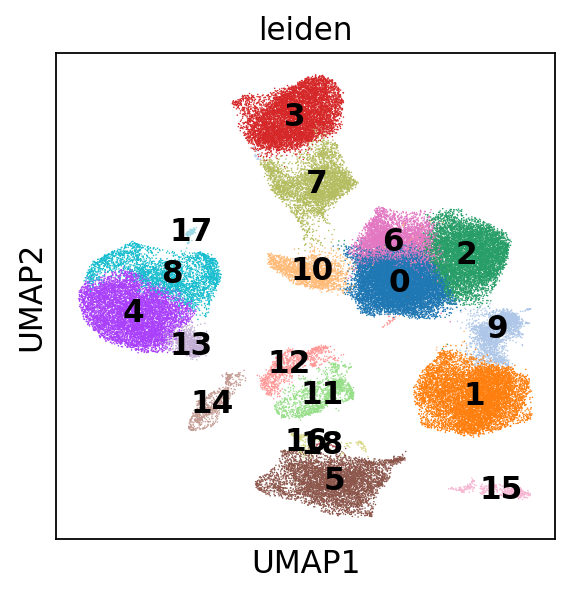

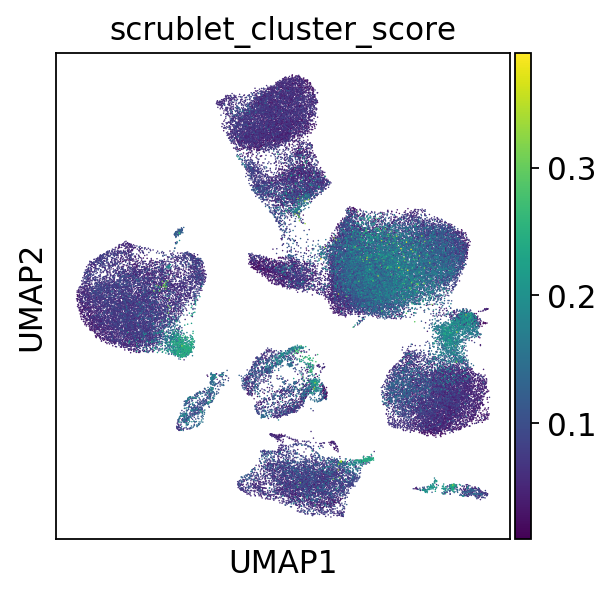

In [3]:
sc.pl.umap(adata, color=['leiden'], legend_loc='on data')
sc.pl.umap(adata, color=['scrublet_cluster_score'])

## Name clusters

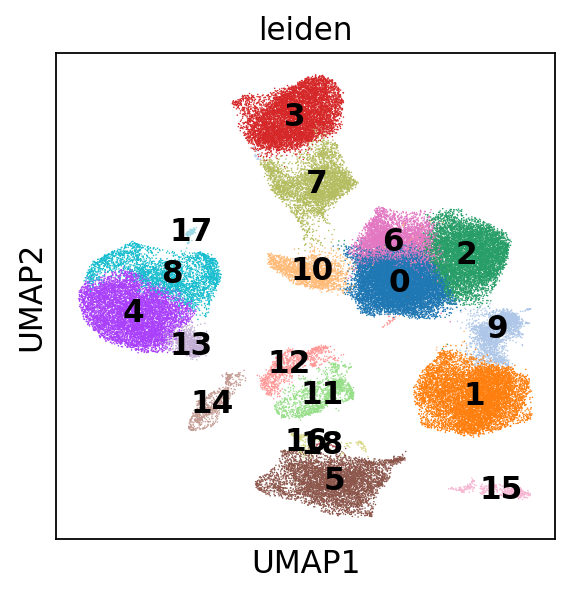

In [4]:
sc.pl.umap(adata, color=['leiden'], legend_loc='on data')

Trying to set attribute `.obs` of view, making a copy.


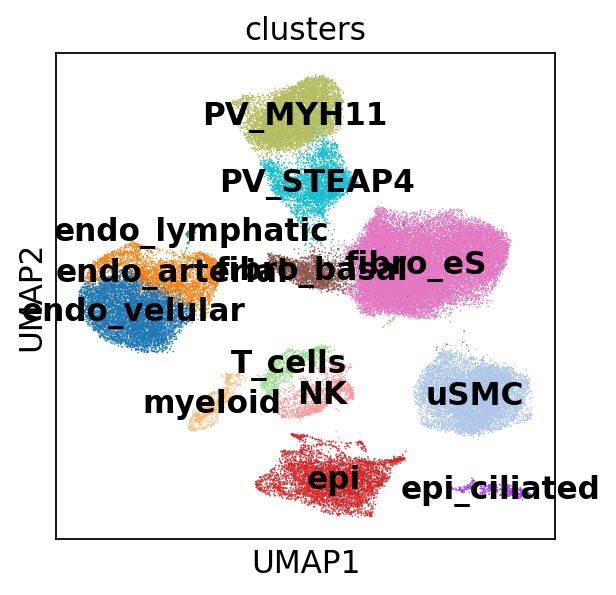

In [5]:
clusters2plot = ['4', '8', '16', '18', '5', '15', '10', '0', '6', '2', '3', '7', '1', '14', '12', '11', '17']
adata = adata[[i in clusters2plot for i in adata.obs['leiden']]]

adata.obs['clusters'] = adata.obs['leiden'].tolist()
# Merge 0_6_2 i 16_18_5
adata.obs.at[adata.obs['clusters'] == '1', 'clusters'] = 'uSMC'
adata.obs.at[adata.obs['clusters'] == '7', 'clusters'] = 'PV_STEAP4'
adata.obs.at[adata.obs['clusters'] == '3', 'clusters'] = 'PV_MYH11'
adata.obs.at[adata.obs['clusters'] == '10', 'clusters'] = 'fibro_basal'
adata.obs.at[adata.obs['clusters'] == '0', 'clusters'] = 'fibro_eS'
adata.obs.at[adata.obs['clusters'] == '2', 'clusters'] = 'fibro_eS'
adata.obs.at[adata.obs['clusters'] == '6', 'clusters'] = 'fibro_eS'
adata.obs.at[adata.obs['clusters'] == '16', 'clusters'] = 'epi'
adata.obs.at[adata.obs['clusters'] == '18', 'clusters'] = 'epi'
adata.obs.at[adata.obs['clusters'] == '5', 'clusters'] = 'epi'
adata.obs.at[adata.obs['clusters'] == '15', 'clusters'] = 'epi_ciliated'
adata.obs.at[adata.obs['clusters'] == '12', 'clusters'] = 'T_cells'
adata.obs.at[adata.obs['clusters'] == '11', 'clusters'] = 'NK'
adata.obs.at[adata.obs['clusters'] == '14', 'clusters'] = 'myeloid'
adata.obs.at[adata.obs['clusters'] == '4', 'clusters'] = 'endo_velular'
adata.obs.at[adata.obs['clusters'] == '8', 'clusters'] = 'endo_arterial'
adata.obs.at[adata.obs['clusters'] == '17', 'clusters'] = 'endo_lymphatic'
# Categorize
adata.obs['clusters'] = adata.obs['clusters'].astype('category')
adata.obs['clusters'].cat.reorder_categories(['endo_velular', 'endo_arterial', 'endo_lymphatic', 'epi', 'epi_ciliated', 'fibro_basal', 'fibro_eS', 'PV_MYH11', 'PV_STEAP4', 'uSMC', 'myeloid', 'T_cells', 'NK'], inplace=True)
sc.pl.umap(adata, color=['clusters'], legend_loc='on data')

## Save metadata

In [6]:
adata.obs.to_csv('data/cell_annotations/endometrium_cellannotation_figure1_20200610.csv')

In [7]:
adata.obs.clusters.values.describe()

,counts,freqs
categories,,
endo_velular,6908,0.111437
endo_arterial,2930,0.047266
endo_lymphatic,101,0.001629
epi,5279,0.085159
epi_ciliated,498,0.008034
fibro_basal,1940,0.031295
fibro_eS,22004,0.354960
PV_MYH11,7255,0.117035
PV_STEAP4,3862,0.062300


## Plot metadata per cluster

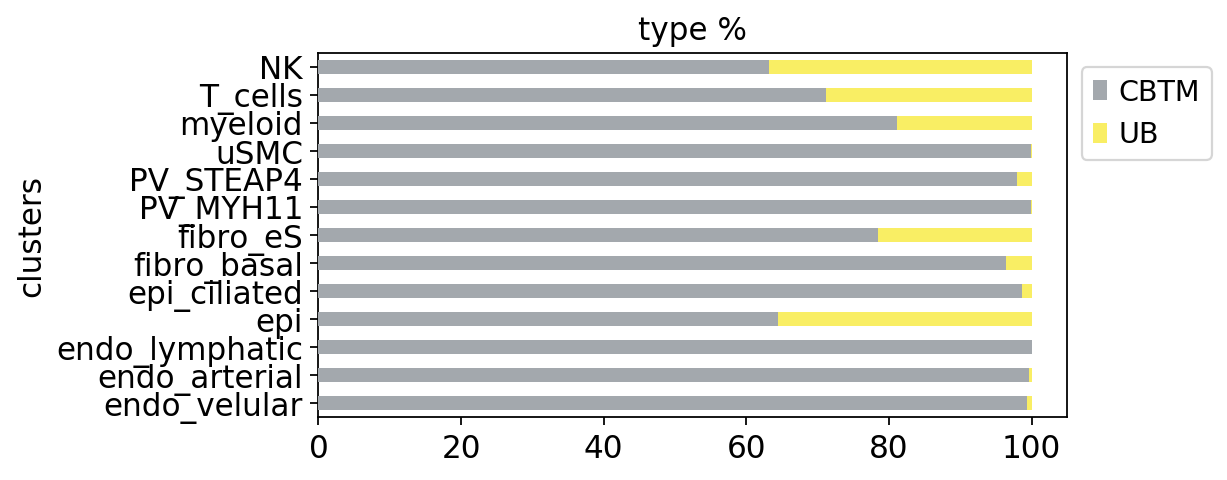

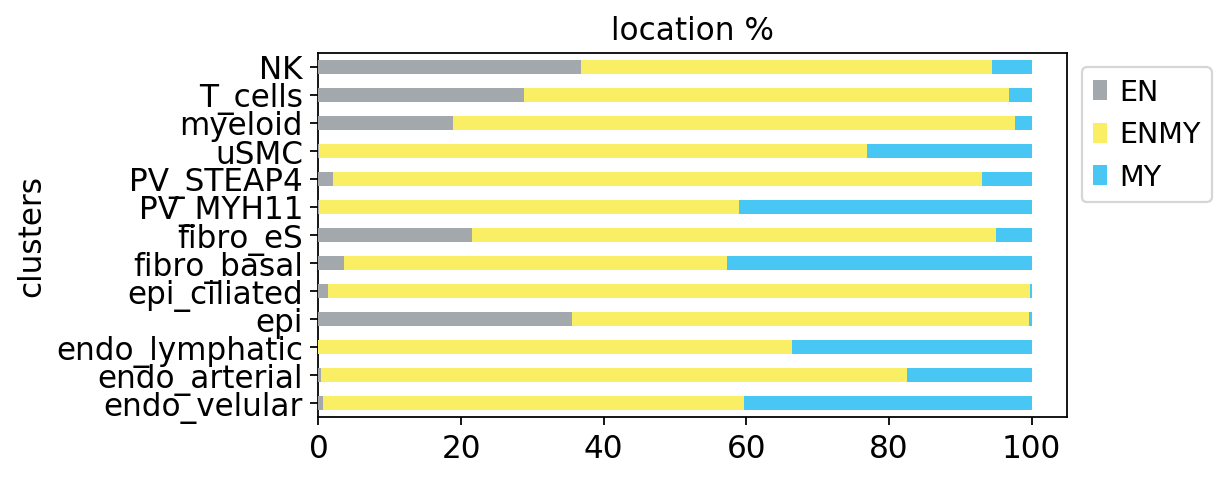

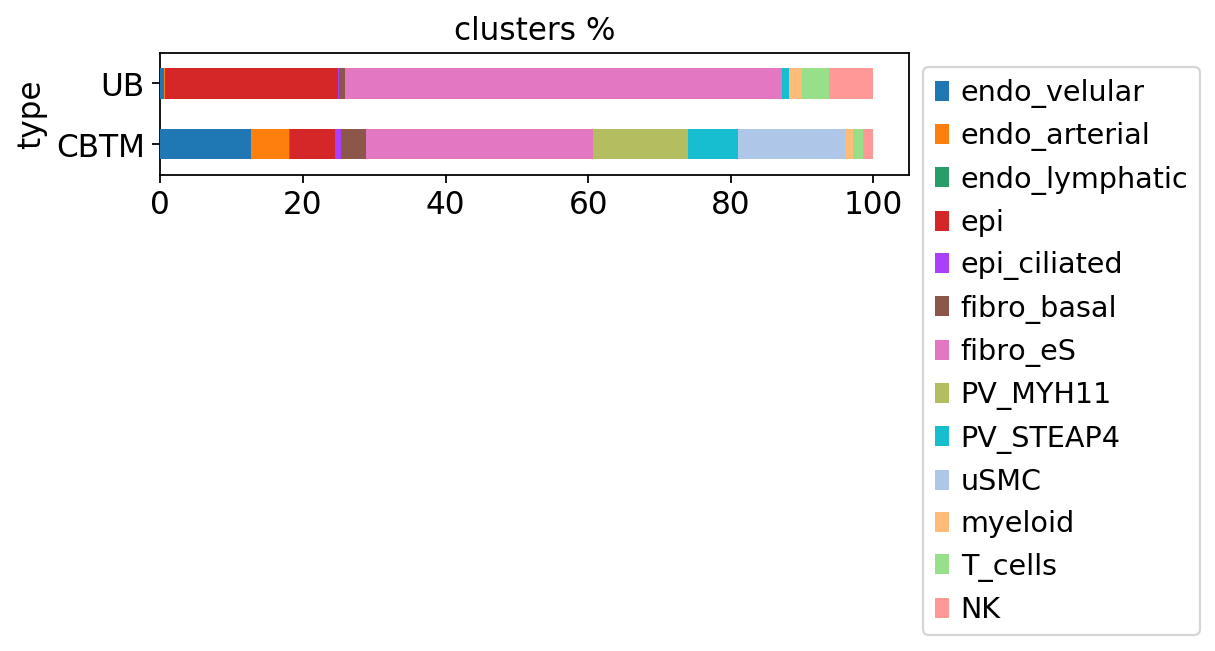

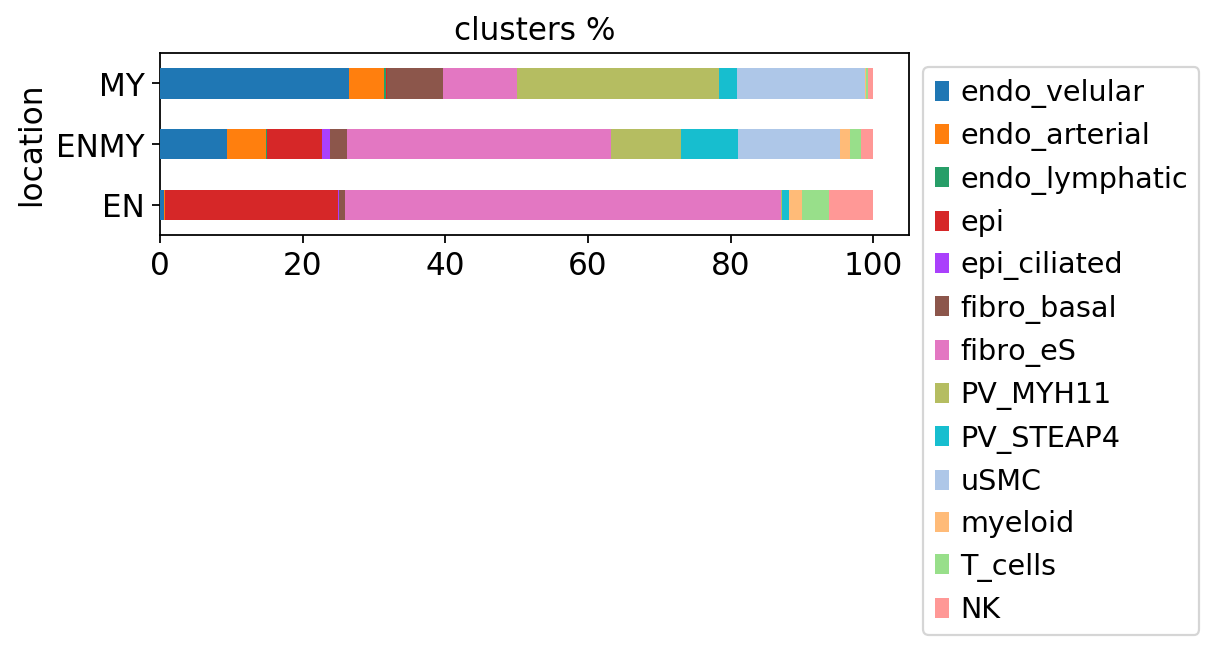

In [8]:
def Barplot(which_var, adata, var='clusters', height=3, color = False):
    plotdata = pd.crosstab(adata.obs[var], adata.obs[which_var], normalize='index') * 100
    if 'category' in plotdata.index.dtype.name:
        plotdata.index.reorder_categories(adata.obs[var].cat.categories[::-1])

    if not color:
        ax1 = plotdata.plot.barh(stacked = True, edgecolor = 'none', zorder = 3, figsize = (6,height), fontsize = 14, grid = False)
    else:
        ax1 = plotdata.plot.barh(stacked = True, edgecolor = 'none', zorder = 3, figsize = (6,height), fontsize = 14, grid = False, color = color)
    ax1.set_title(which_var+' %')
    ax1.set_ylabel(var)
    horiz_offset = 1
    vert_offset = 1.
    ax1 = ax1.legend(bbox_to_anchor = (horiz_offset, vert_offset))
    ax1.figure.savefig(str(sc.settings.figdir)+'/barplot_'+var+'_proportions_'+which_var+'.pdf', bbox_inches='tight',
                       dpi=300, orientation='landscape', format= 'pdf', optimize=True)

Barplot('type', adata, 'clusters', 3, color = ['#A3A8AD', '#F9EE64', '#48C7F4'])
Barplot('location', adata, 'clusters', 3, color = ['#A3A8AD', '#F9EE64', '#48C7F4'])

Barplot('clusters', adata, 'type', 1, color = adata.uns['clusters_colors'])
Barplot('clusters', adata, 'location', 1.5, color = adata.uns['clusters_colors'])

# get quick DEGs

In [9]:
adata_count = anndata.AnnData(X=adata.raw.X, var=adata.raw.var, obs=adata.obs, asview=False)
sc.pp.normalize_per_cell(adata_count, counts_per_cell_after=1e4)
sc.pp.log1p(adata_count)
sc.pp.scale(adata_count, max_value=10)
# marker calling

In [10]:
sc.tl.rank_genes_groups(adata_count, groupby='clusters', n_genes=50000, use_raw=False, ) #, method='logreg'

/home/jovyan/my-conda-envs/myenvSC/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:223: RuntimeWarning: invalid value encountered in log2
  rankings_gene_logfoldchanges.append(np.log2(foldchanges[global_indices]))


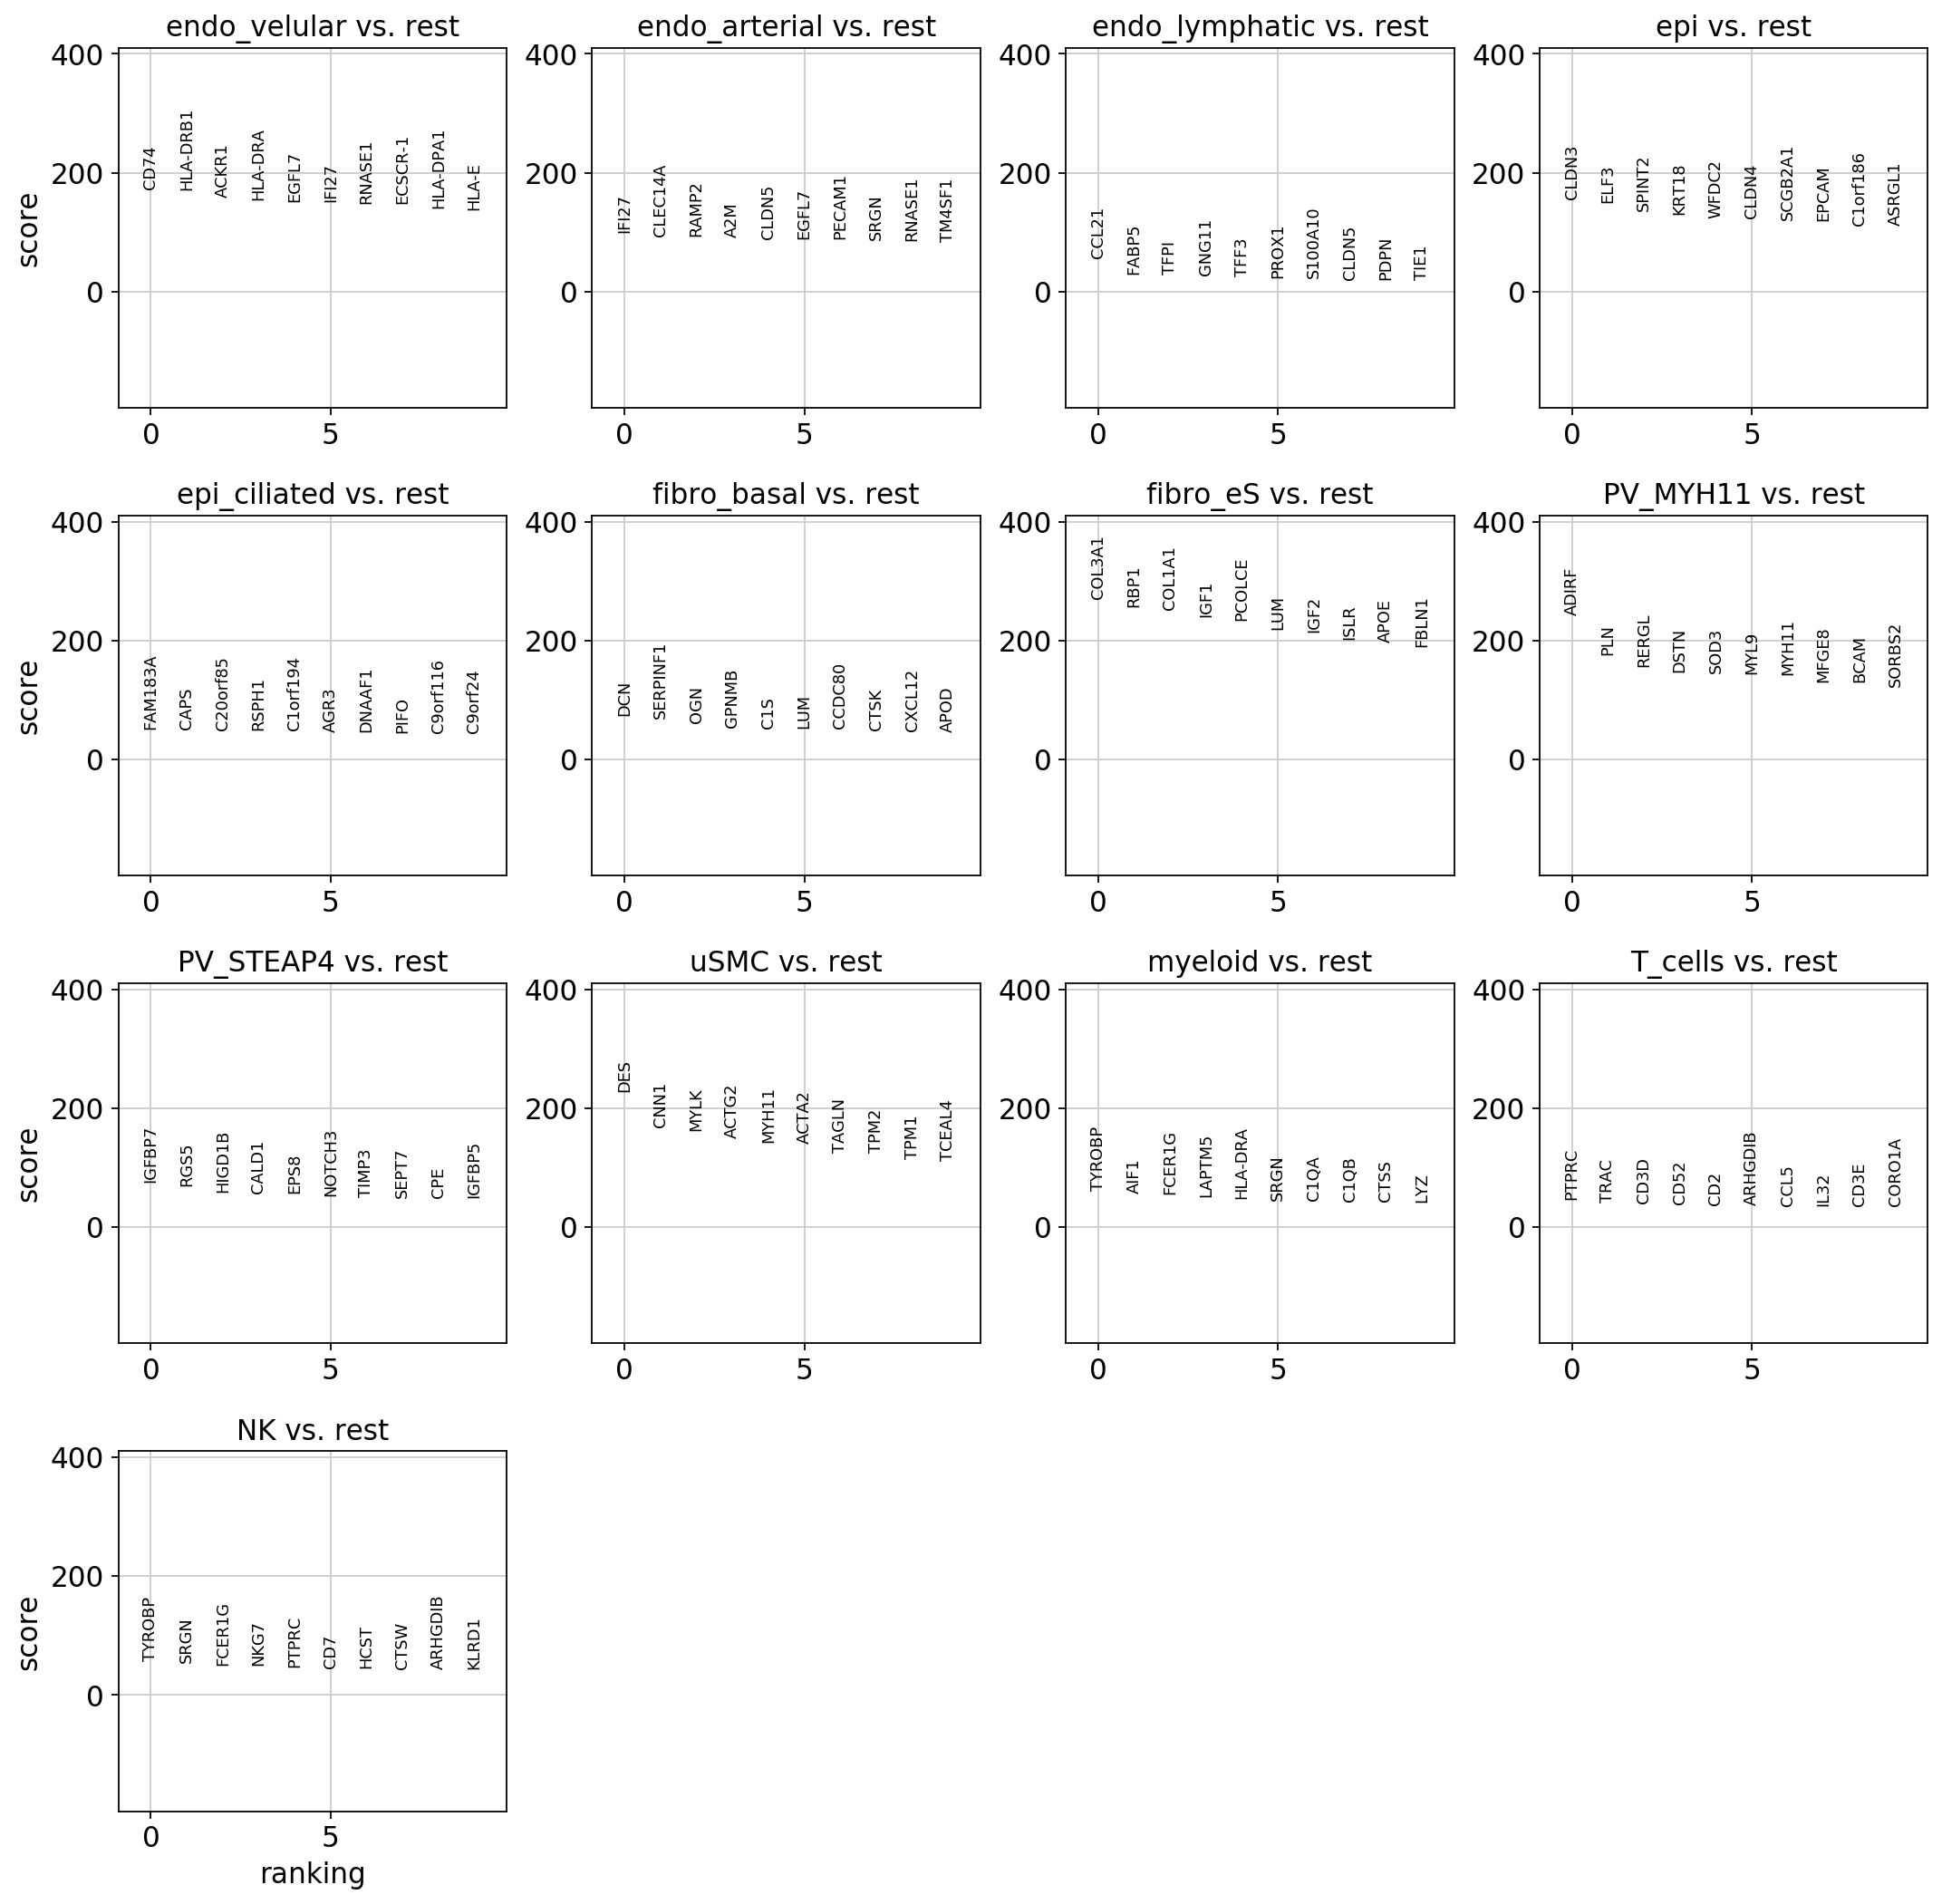

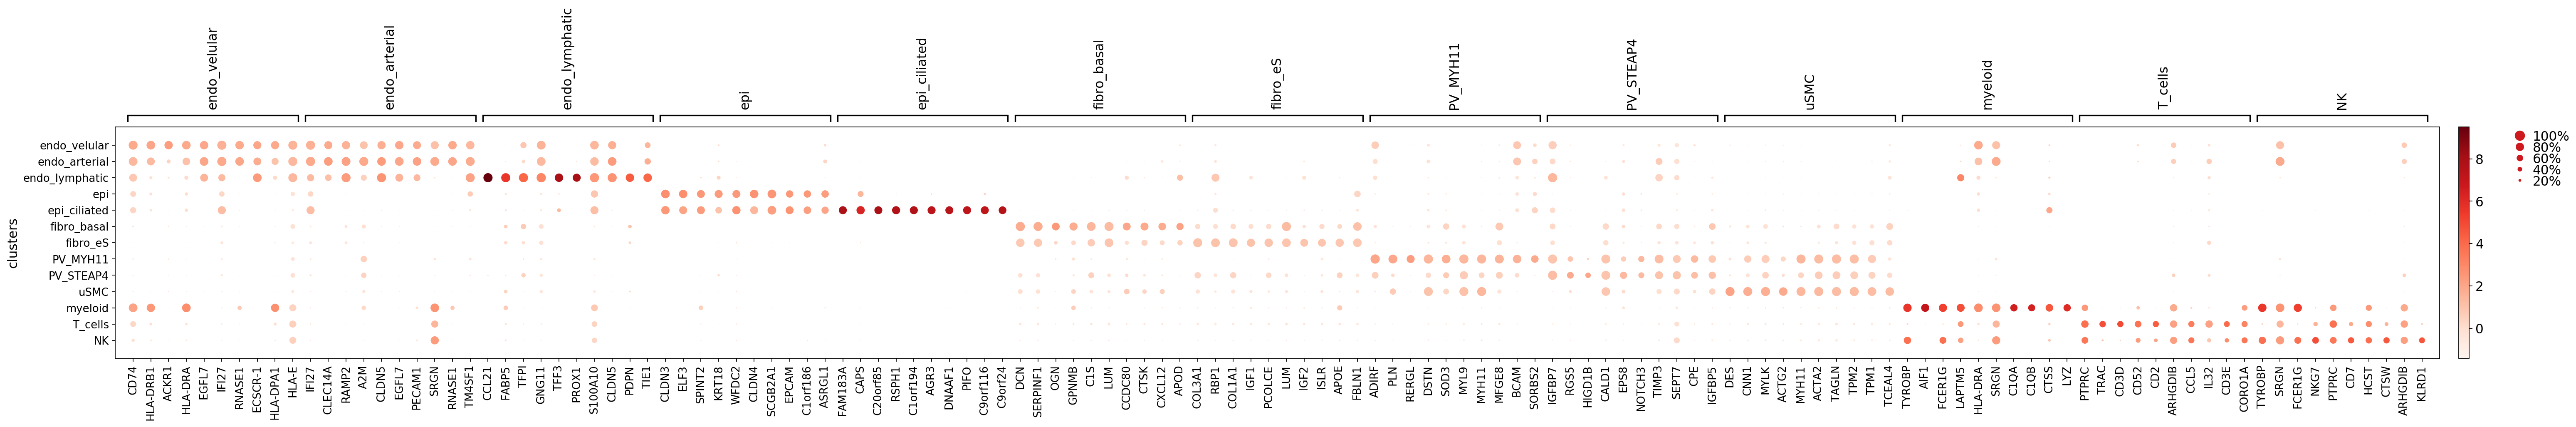

In [11]:
# marker visualisation
sc.pl.rank_genes_groups(adata_count, n_genes=10, save='.pdf')
sc.pl.rank_genes_groups_dotplot(adata_count, n_genes=10, dendrogram=False, save='_DEscanpy.pdf')

In [12]:
result = adata_count.uns['rank_genes_groups']

adata_count = anndata.AnnData(X=np.expm1(adata.raw.X), var=adata.raw.var, obs=adata.obs, asview=False)
sc.pp.normalize_per_cell(adata_count, counts_per_cell_after=1e4)

os.system('mkdir -p '+str(sc.settings.figdir)+'/cluster_markers/')
# os.system('rm '+str(sc.settings.figdir)+'/cluster_markers/*scanpy*.csv')

for group in result['names'].dtype.names:
    print(group)
    adata_clus = adata_count[adata_count.obs['clusters'] == group]
    adata_rest = adata_count[[not i for i in adata_count.obs['clusters']==group]]
    mask = (result['pvals_adj'][group]<=1) & (result['scores'][group]>0)
    markdict = {'gene_'+key: result[key][group][mask] for key in ['names', 'pvals', 'pvals_adj', 'logfoldchanges']}
    adata_clus = adata_clus[:,markdict['gene_names']]
    adata_rest = adata_rest[:,markdict['gene_names']]
    markdict['mean_cluster'] = np.asarray(np.mean(adata_clus.X,axis=0)).reshape(-1)
    markdict['mean_rest'] = np.asarray(np.mean(adata_rest.X,axis=0)).reshape(-1)
    markdict['log2_FC'] = np.asarray(np.log2(markdict['mean_cluster']/markdict['mean_rest'])).reshape(-1)
    #are you expressed?
    adata_clus.X = adata_clus.X > 0
    adata_rest.X = adata_rest.X > 0
    markdict['percent_cluster'] = np.asarray(100*np.sum(adata_clus.X,axis=0)/adata_clus.shape[0]).reshape(-1)
    markdict['percent_rest'] = np.asarray(100*np.sum(adata_rest.X,axis=0)/adata_rest.shape[0]).reshape(-1)
    df = pd.DataFrame(markdict)
    df.rename(columns={'gene_names':'Gene',
                       'gene_logfoldchanges':'logFC',
                       'log2_FC':'log2_FC',
                       'gene_pvals':'P.Value',
                       'gene_pvals_adj':'adj.P.Val',
                       'mean_cluster':'mean_cluster',
                       'mean_rest':'mean_rest'},
              inplace=True)
    df.to_csv(str(sc.settings.figdir)+'/cluster_markers/'+group+'_scanpy_DEGs.csv')

/home/jovyan/my-conda-envs/myenvSC/lib/python3.7/site-packages/scipy/sparse/data.py:132: RuntimeWarning: overflow encountered in expm1
  result = op(self._deduped_data())


endo_velular


/home/jovyan/my-conda-envs/myenvSC/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in true_divide
/home/jovyan/my-conda-envs/myenvSC/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide
/home/jovyan/my-conda-envs/myenvSC/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log2
/home/jovyan/my-conda-envs/myenvSC/lib/python3.7/site-packages/scipy/sparse/compressed.py:213: RuntimeWarning: invalid value encountered in greater
  res = self._with_data(op(self.data, other), copy=True)
Trying to set attribute `.X` of view, making a copy.
Trying to set attribute `.X` of view, making a copy.


endo_arterial


/home/jovyan/my-conda-envs/myenvSC/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in true_divide
/home/jovyan/my-conda-envs/myenvSC/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide
/home/jovyan/my-conda-envs/myenvSC/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log2
/home/jovyan/my-conda-envs/myenvSC/lib/python3.7/site-packages/scipy/sparse/compressed.py:213: RuntimeWarning: invalid value encountered in greater
  res = self._with_data(op(self.data, other), copy=True)
Trying to set attribute `.X` of view, making a copy.
Trying to set attribute `.X` of view, making a copy.


endo_lymphatic


/home/jovyan/my-conda-envs/myenvSC/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide
/home/jovyan/my-conda-envs/myenvSC/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log2
/home/jovyan/my-conda-envs/myenvSC/lib/python3.7/site-packages/scipy/sparse/compressed.py:213: RuntimeWarning: invalid value encountered in greater
  res = self._with_data(op(self.data, other), copy=True)
Trying to set attribute `.X` of view, making a copy.
Trying to set attribute `.X` of view, making a copy.


epi


/home/jovyan/my-conda-envs/myenvSC/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in true_divide
/home/jovyan/my-conda-envs/myenvSC/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide
/home/jovyan/my-conda-envs/myenvSC/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log2
/home/jovyan/my-conda-envs/myenvSC/lib/python3.7/site-packages/scipy/sparse/compressed.py:213: RuntimeWarning: invalid value encountered in greater
  res = self._with_data(op(self.data, other), copy=True)
Trying to set attribute `.X` of view, making a copy.
Trying to set attribute `.X` of view, making a copy.


epi_ciliated


/home/jovyan/my-conda-envs/myenvSC/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in true_divide
/home/jovyan/my-conda-envs/myenvSC/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide
/home/jovyan/my-conda-envs/myenvSC/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log2
/home/jovyan/my-conda-envs/myenvSC/lib/python3.7/site-packages/scipy/sparse/compressed.py:213: RuntimeWarning: invalid value encountered in greater
  res = self._with_data(op(self.data, other), copy=True)
Trying to set attribute `.X` of view, making a copy.
Trying to set attribute `.X` of view, making a copy.


fibro_basal


/home/jovyan/my-conda-envs/myenvSC/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in true_divide
/home/jovyan/my-conda-envs/myenvSC/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide
/home/jovyan/my-conda-envs/myenvSC/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log2
/home/jovyan/my-conda-envs/myenvSC/lib/python3.7/site-packages/scipy/sparse/compressed.py:213: RuntimeWarning: invalid value encountered in greater
  res = self._with_data(op(self.data, other), copy=True)
Trying to set attribute `.X` of view, making a copy.
Trying to set attribute `.X` of view, making a copy.


fibro_eS


/home/jovyan/my-conda-envs/myenvSC/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in true_divide
/home/jovyan/my-conda-envs/myenvSC/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide
/home/jovyan/my-conda-envs/myenvSC/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log2
/home/jovyan/my-conda-envs/myenvSC/lib/python3.7/site-packages/scipy/sparse/compressed.py:213: RuntimeWarning: invalid value encountered in greater
  res = self._with_data(op(self.data, other), copy=True)
Trying to set attribute `.X` of view, making a copy.
Trying to set attribute `.X` of view, making a copy.


PV_MYH11


/home/jovyan/my-conda-envs/myenvSC/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in true_divide
/home/jovyan/my-conda-envs/myenvSC/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide
/home/jovyan/my-conda-envs/myenvSC/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log2
/home/jovyan/my-conda-envs/myenvSC/lib/python3.7/site-packages/scipy/sparse/compressed.py:213: RuntimeWarning: invalid value encountered in greater
  res = self._with_data(op(self.data, other), copy=True)
Trying to set attribute `.X` of view, making a copy.
Trying to set attribute `.X` of view, making a copy.


PV_STEAP4


/home/jovyan/my-conda-envs/myenvSC/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in true_divide
/home/jovyan/my-conda-envs/myenvSC/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide
/home/jovyan/my-conda-envs/myenvSC/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log2
/home/jovyan/my-conda-envs/myenvSC/lib/python3.7/site-packages/scipy/sparse/compressed.py:213: RuntimeWarning: invalid value encountered in greater
  res = self._with_data(op(self.data, other), copy=True)
Trying to set attribute `.X` of view, making a copy.
Trying to set attribute `.X` of view, making a copy.


uSMC


/home/jovyan/my-conda-envs/myenvSC/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in true_divide
/home/jovyan/my-conda-envs/myenvSC/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide
/home/jovyan/my-conda-envs/myenvSC/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log2
/home/jovyan/my-conda-envs/myenvSC/lib/python3.7/site-packages/scipy/sparse/compressed.py:213: RuntimeWarning: invalid value encountered in greater
  res = self._with_data(op(self.data, other), copy=True)
Trying to set attribute `.X` of view, making a copy.
Trying to set attribute `.X` of view, making a copy.


myeloid


/home/jovyan/my-conda-envs/myenvSC/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in true_divide
/home/jovyan/my-conda-envs/myenvSC/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide
/home/jovyan/my-conda-envs/myenvSC/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log2
/home/jovyan/my-conda-envs/myenvSC/lib/python3.7/site-packages/scipy/sparse/compressed.py:213: RuntimeWarning: invalid value encountered in greater
  res = self._with_data(op(self.data, other), copy=True)
Trying to set attribute `.X` of view, making a copy.
Trying to set attribute `.X` of view, making a copy.


T_cells


/home/jovyan/my-conda-envs/myenvSC/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in true_divide
/home/jovyan/my-conda-envs/myenvSC/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide
/home/jovyan/my-conda-envs/myenvSC/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log2
/home/jovyan/my-conda-envs/myenvSC/lib/python3.7/site-packages/scipy/sparse/compressed.py:213: RuntimeWarning: invalid value encountered in greater
  res = self._with_data(op(self.data, other), copy=True)
Trying to set attribute `.X` of view, making a copy.
Trying to set attribute `.X` of view, making a copy.


NK


/home/jovyan/my-conda-envs/myenvSC/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in true_divide
/home/jovyan/my-conda-envs/myenvSC/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide
/home/jovyan/my-conda-envs/myenvSC/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log2
/home/jovyan/my-conda-envs/myenvSC/lib/python3.7/site-packages/scipy/sparse/compressed.py:213: RuntimeWarning: invalid value encountered in greater
  res = self._with_data(op(self.data, other), copy=True)
Trying to set attribute `.X` of view, making a copy.
Trying to set attribute `.X` of view, making a copy.


## Plot Selected Markers

In [13]:
adata_count = anndata.AnnData(X=adata.raw.X, var=adata.raw.var, obs=adata.obs, asview=False)
sc.pp.normalize_per_cell(adata_count, counts_per_cell_after=1e4)
sc.pp.log1p(adata_count)
# sc.pp.scale(adata_count)

43
42


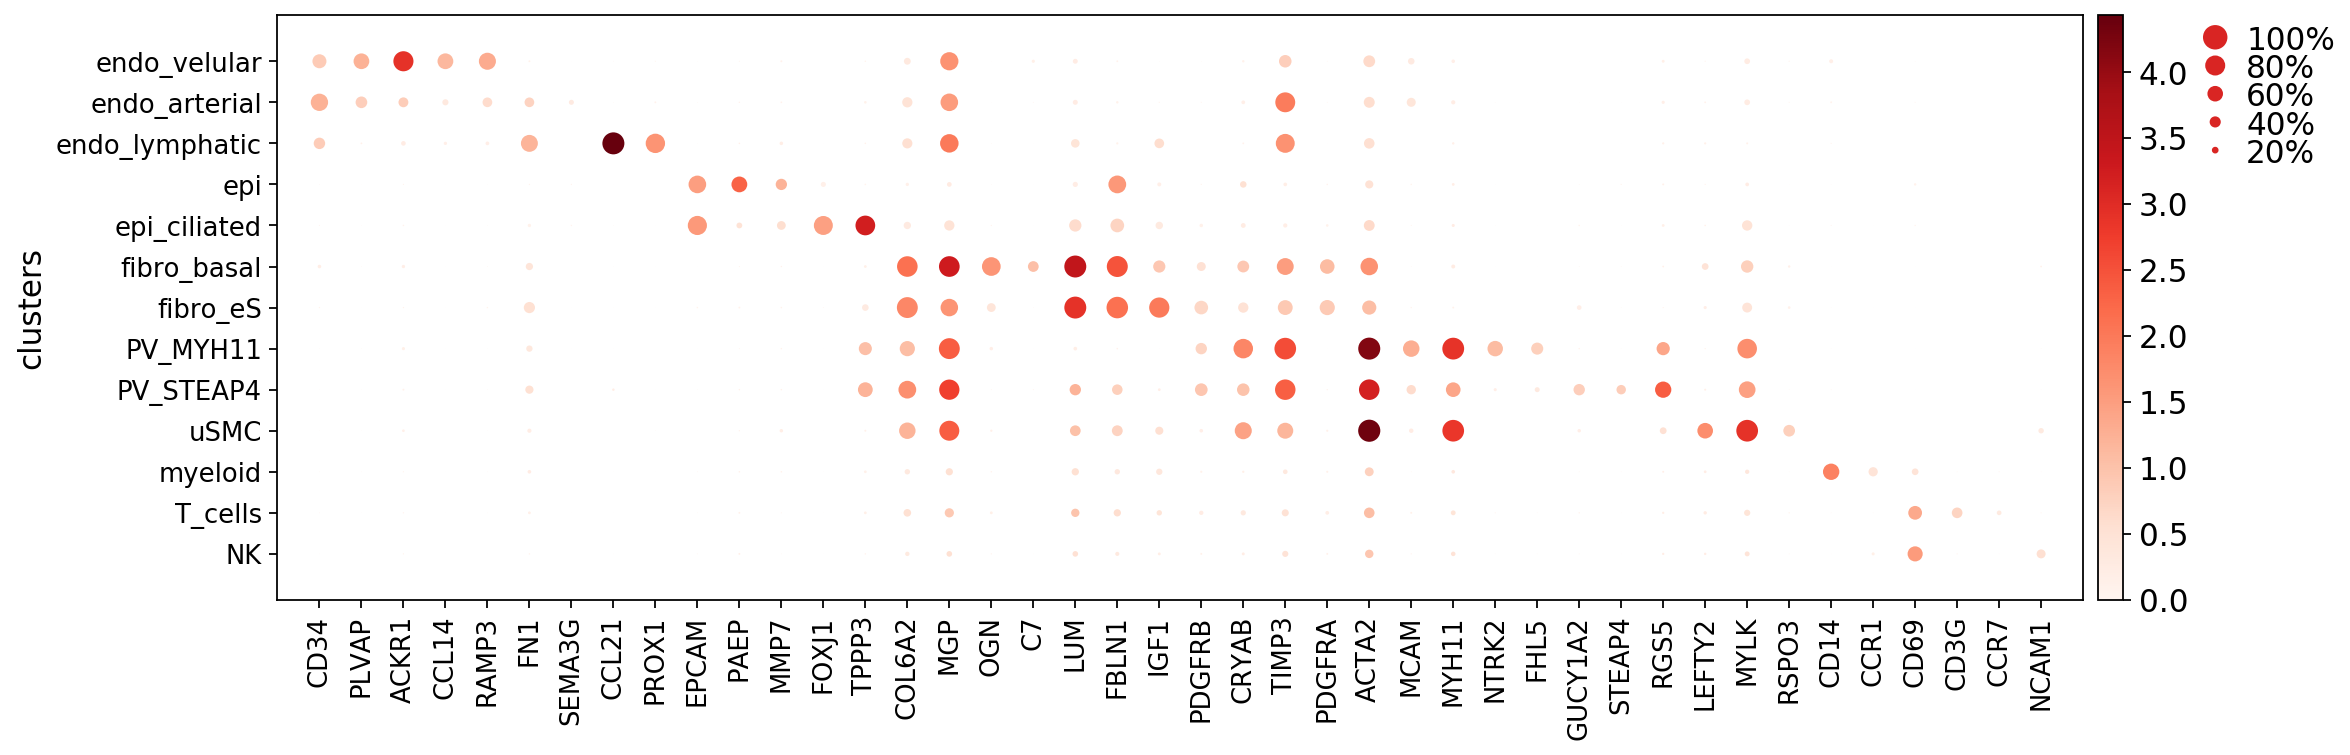

GridSpec(2, 5, height_ratios=[0, 10.5], width_ratios=[14.7, 0, 0.2, 0.5, 0.25])

In [14]:
with open('data/markers/Markers_ALL.csv','r') as fid:
    markers = [line.rstrip() for line in fid.readlines()]

print(len(markers))
#make sure they're in the dataset, and sort them alphabetically for ease of finding things
no_markers = [item for item in markers if item not in adata_count.var_names]
markers = [item for item in markers if item in adata_count.var_names]
print(len(markers))

sc.pl.dotplot(adata_count, markers, groupby='clusters', dendrogram=False, save='_selected_markers.pdf')

### Load fine-grained clusters annotation

In [15]:
meta = pd.read_csv('data/cell_annotations/endometrium_cellannotation_clean_20200610.csv')
meta = meta.set_index('index')
meta.cell_annotation = meta.cell_annotation.str.replace('\/', '-')
meta.cell_annotation = meta.cell_annotation.str.replace(' ', '_')

Merge epithelial proliferative and exclude epithelial clusters LHX1 and KRT5 as we think are contaminants

In [16]:
pro_idx = np.array([ 'epithelial_proliferative' in i for i in meta['cell_annotation'] ])
meta.at[ pro_idx , 'cell_annotation'] = 'epithelial_PGR'

meta = meta[meta['cell_annotation'] != 'epithelial_KRT5']
meta = meta[meta['cell_annotation'] != 'epithelial_LHX1']

### Transfer cluster annotation labels

Remove barcodes not in meta

In [17]:
barcodes = meta.index.tolist()
adata = adata[[ i in barcodes for i in adata.obs_names]]

Now transfer labels

Trying to set attribute `.obs` of view, making a copy.
... storing 'clusters' as categorical


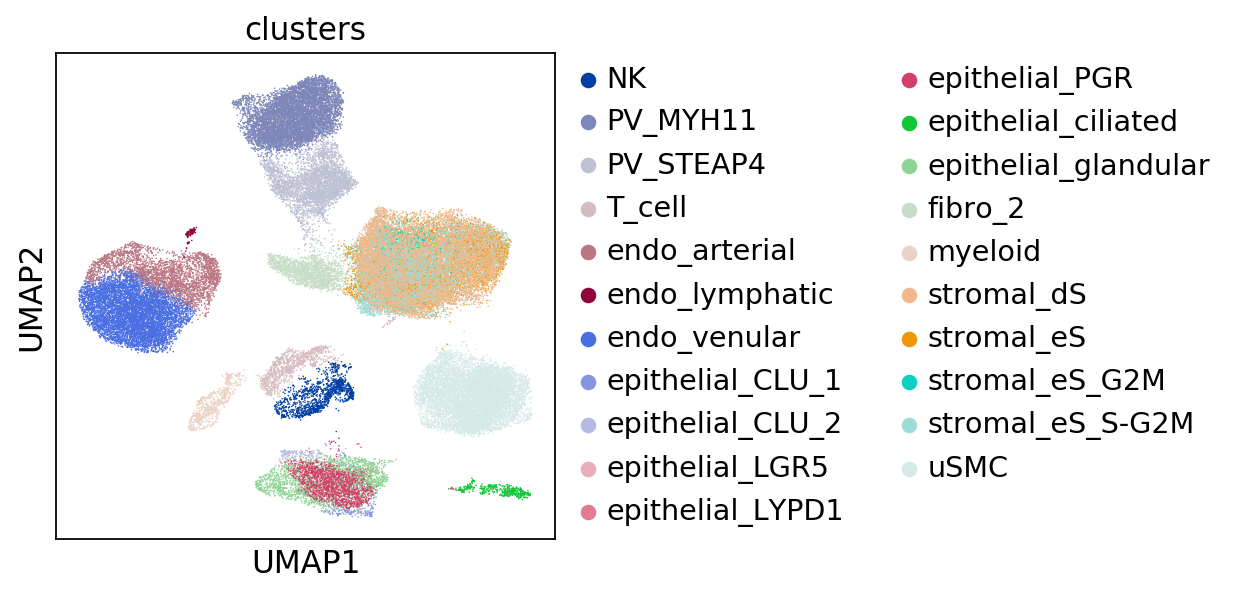

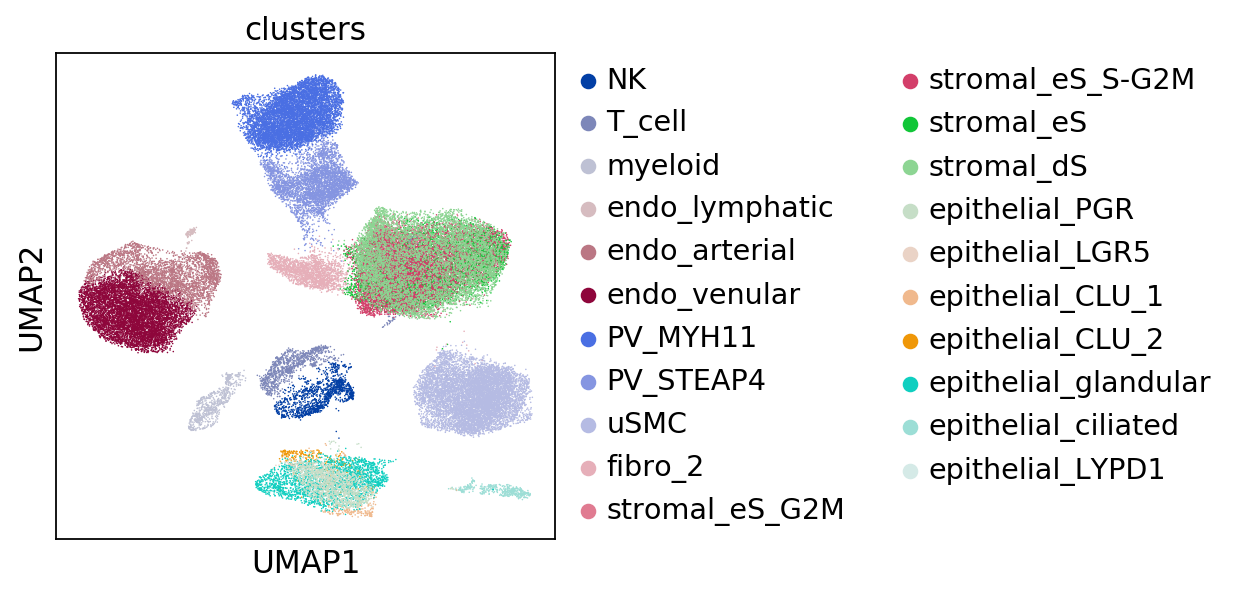

In [18]:
cell_annot = meta['cell_annotation'].to_dict()
adata.obs['clusters'] = [ cell_annot[str(i)] for i in adata.obs_names ]
sc.pl.umap(adata, color=['clusters'])

# order: epi_PGR; epi LGR5; Epi CLU1; Epi CLU2; epi glandular; epi ciliated; epi LYPD1
adata.obs['clusters'].cat.reorder_categories(['NK', 'T_cell', 'myeloid', 
                                              'endo_lymphatic', 'endo_arterial', 'endo_venular', 
                                              'PV_MYH11', 'PV_STEAP4', 'uSMC', 
                                              'fibro_2', 'stromal_eS_G2M', 'stromal_eS_S-G2M', 'stromal_eS', 'stromal_dS',
                                              'epithelial_PGR', 'epithelial_LGR5', 'epithelial_CLU_1', 'epithelial_CLU_2',
                                              'epithelial_glandular', 'epithelial_ciliated', 'epithelial_LYPD1' ], inplace=True)

sc.pl.umap(adata, color=['clusters'])

In [19]:
# Write stats
stats = adata.obs.clusters.values.describe()
stats.to_csv(str(sc.settings.figdir)+'/cluster_stats.csv')
stats

,counts,freqs
categories,,
NK,1295,0.021156
T_cell,1026,0.016762
myeloid,728,0.011893
endo_lymphatic,101,0.001650
endo_arterial,2930,0.047867
endo_venular,6908,0.112856
PV_MYH11,7255,0.118524
PV_STEAP4,3862,0.063093
uSMC,8164,0.133375


... storing 'majorcelltypes' as categorical


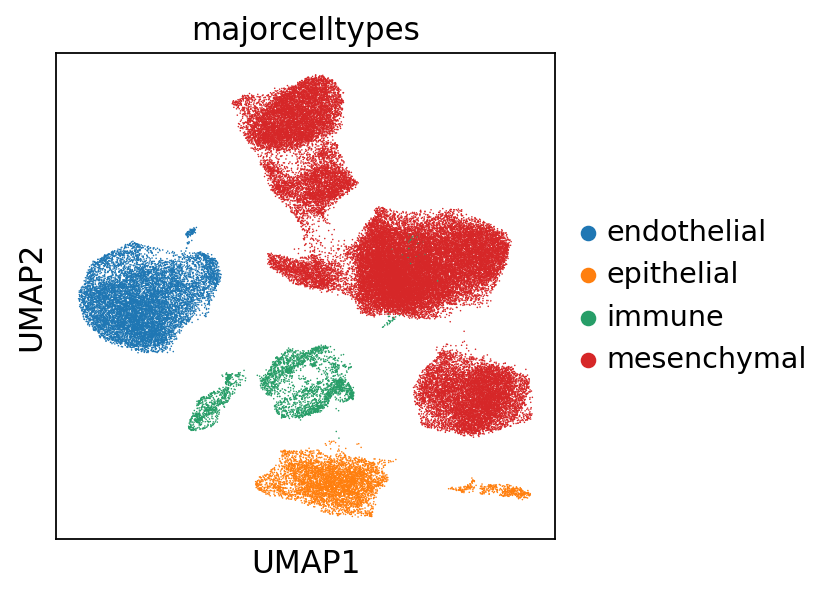

In [20]:
# Group cell populations
adata.obs['majorcelltypes'] = 'epithelial'

adata.obs.at[adata.obs['clusters'] == 'NK', 'majorcelltypes'] = 'immune'
adata.obs.at[adata.obs['clusters'] == 'T_cell', 'majorcelltypes'] = 'immune'
adata.obs.at[adata.obs['clusters'] == 'myeloid', 'majorcelltypes'] = 'immune'
adata.obs.at[adata.obs['clusters'] == 'endo_lymphatic', 'majorcelltypes'] = 'endothelial'
adata.obs.at[adata.obs['clusters'] == 'endo_arterial', 'majorcelltypes'] = 'endothelial'
adata.obs.at[adata.obs['clusters'] == 'endo_venular', 'majorcelltypes'] = 'endothelial'
adata.obs.at[adata.obs['clusters'] == 'PV_MYH11', 'majorcelltypes'] = 'mesenchymal'
adata.obs.at[adata.obs['clusters'] == 'PV_STEAP4', 'majorcelltypes'] = 'mesenchymal'
adata.obs.at[adata.obs['clusters'] == 'uSMC', 'majorcelltypes'] = 'mesenchymal'
adata.obs.at[adata.obs['clusters'] == 'fibro_2', 'majorcelltypes'] = 'mesenchymal'
adata.obs.at[adata.obs['clusters'] == 'stromal_eS_G2M', 'majorcelltypes'] = 'mesenchymal'
adata.obs.at[adata.obs['clusters'] == 'stromal_eS_S-G2M', 'majorcelltypes'] = 'mesenchymal'
adata.obs.at[adata.obs['clusters'] == 'stromal_eS', 'majorcelltypes'] = 'mesenchymal'
adata.obs.at[adata.obs['clusters'] == 'stromal_dS', 'majorcelltypes'] = 'mesenchymal'


sc.pl.umap(adata, color=['majorcelltypes'])

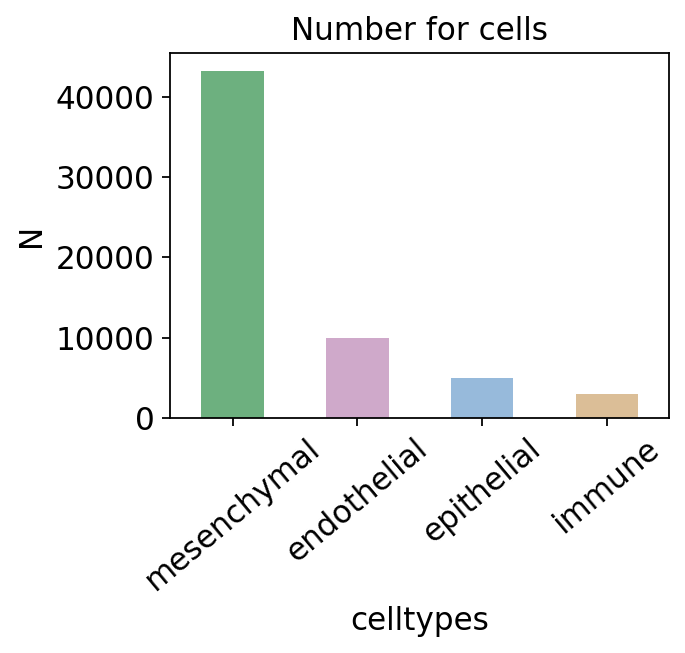

In [21]:
ax = adata.obs['majorcelltypes'].value_counts().plot(kind='bar',
                                    figsize=(4,3),
                                    title="Number for cells",
                                    fontsize = 14, grid = False, rot=40, color = ['#6db07f', '#cfa9ca', '#97badb', '#dbbe97'])
ax.set_xlabel("celltypes")
ax.set_ylabel("N")
ax.figure.savefig(str(sc.settings.figdir)+'/barplot_majorcelltypes.pdf', bbox_inches='tight',
                       dpi=300, orientation='landscape', format= 'pdf', optimize=True)

In [22]:
# Write stats
stats = adata.obs.majorcelltypes.values.describe()
stats.to_csv(str(sc.settings.figdir)+'/majorcelltypes_stats.csv')

### Plot GWAS genes

In [ ]:
adata_count = anndata.AnnData(X=adata.raw.X, var=adata.raw.var, obs=adata.obs, asview=False)
sc.pp.normalize_per_cell(adata_count, counts_per_cell_after=1e4)
sc.pp.log1p(adata_count)
sc.pp.scale(adata_count)

In [ ]:
with open('data/markers/EndometriosisGenes.csv','r') as fid:
    markers = [line.rstrip() for line in fid.readlines()]

print(len(markers))
#make sure they're in the dataset, and sort them alphabetically for ease of finding things
no_markers = [item for item in markers if item not in adata_count.var_names]
markers = [item for item in markers if item in adata_count.var_names]
print(len(markers))

# markers = sorted(list(set(markers)))
sc.pl.dotplot(adata_count, markers, groupby='clusters', dendrogram=False, save='_GWASendometriosis_allprimary.pdf')
no_markers

In [ ]:
with open('data/markers/menstrualCycle.csv','r') as fid:
    markers = [line.rstrip() for line in fid.readlines()]

print(len(markers))
#make sure they're in the dataset, and sort them alphabetically for ease of finding things
no_markers = [item for item in markers if item not in adata_count.var_names]
markers = [item for item in markers if item in adata_count.var_names]
print(len(markers))

# markers = sorted(list(set(markers)))
sc.pl.dotplot(adata_count, markers, groupby='clusters', dendrogram=False, save='_GWASmesntrualcycle_allprimary.pdf')
no_markers

In [ ]:
with open('data/markers/CancerGenes.csv','r') as fid:
    markers = [line.rstrip() for line in fid.readlines()]

print(len(markers))
#make sure they're in the dataset, and sort them alphabetically for ease of finding things
no_markers = [item for item in markers if item not in adata_count.var_names]
markers = [item for item in markers if item in adata_count.var_names]
print(len(markers))

# markers = sorted(list(set(markers)))
sc.pl.dotplot(adata_count, markers, groupby='clusters', dendrogram=False, save='_GWAScancerGenes_allprimary.pdf')
no_markers

## Plot metadata per cluster

In [ ]:
def Barplot(which_var, adata, var='clusters', height=3, color = False):
    plotdata = pd.crosstab(adata.obs[var], adata.obs[which_var], normalize='index') * 100
    if 'category' in plotdata.index.dtype.name:
        plotdata.index.reorder_categories(adata.obs[var].cat.categories[::-1])

    if not color:
        ax1 = plotdata.plot.barh(stacked = True, edgecolor = 'none', zorder = 3, figsize = (6,height), fontsize = 14, grid = False)
    else:
        ax1 = plotdata.plot.barh(stacked = True, edgecolor = 'none', zorder = 3, figsize = (6,height), fontsize = 14, grid = False, color = color)
    ax1.set_title(which_var+' %')
    ax1.set_ylabel(var)
    horiz_offset = 1
    vert_offset = 1.
    ax1 = ax1.legend(bbox_to_anchor = (horiz_offset, vert_offset))
    ax1.figure.savefig(str(sc.settings.figdir)+'/barplot_'+var+'_proportions_'+which_var+'.pdf', bbox_inches='tight',
                       dpi=300, orientation='landscape', format= 'pdf', optimize=True)

Barplot('type', adata, 'clusters', 6)